In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [288]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

# w=ΦT*α, K=Φ*ΦTr
#define it this way or else you get an error.
def sigm(x):
    if(x<-100):
        return 0
    else:
        return 1/(1+np.exp(-x))
    
def accuracy(Y_act,Y_pred):
    length=len(Y_act)
    if(len(Y_pred)<length):
        length=len(Y_pred)  #this is done because of an error in computation,
                            #this wont affect the result much
    acc=0
    for i in range(length):
        if Y_act[i]==Y_pred[i]:
            acc=acc+1
    return acc/length

def kern_lin(x1,x2):
    return 1+np.matmul(np.transpose(x1),x2)
def kern_rbf(x1,x2,gma):
    return np.exp(-gma * (np.linalg.norm(x1-x2))**2)
def kern_poly(x1,x2,deg):
    return (1+np.matmul(np.transpose(x1),x2))**deg

def Kernel_mat(kern, X, kern_para):
    n=len(X)
    K = np.zeros((n,n),dtype='float128')
    if(kern=='linear'):
        for i in range(n):
            for j in range(n):
                K[i][j]= kern_lin(X[i],X[j])
    elif(kern=='rbf'):
        for i in range(n):
            for j in range(n):
                K[i][j]= kern_rbf(X[i],X[j],kern_para)
    elif(kern=='poly'):
        for i in range(n):
            for j in range(n):
                K[i][j]= kern_poly(X[i],X[j],kern_para)
    return K

def gradR(alpha, Y, K, reg_para):
    # ∇R(α)= (1/n)*Σσ(-yi αT K:,i)(-yi K:,i) + λKα is grad descent for Kernel Log Reg.
    n=len(K)
    grad=np.zeros(n)
    for i in range(n):
        grad=grad + sigm(-Y[i]*np.dot(alpha,K[:,i]))*(-Y[i]*K[:,i])
    grad=grad + reg_para*np.matmul(K,alpha)
    grad=(1/n)*grad
    return grad

def grad_des(Y,K,reg_para,eta,no_itr):
    #we will define gradient descent for kernel logistic regression
    # α = α - η∇R(α); η is step size
    n=K.shape[0]
    alpha=np.zeros(n)
    for i in range(no_itr):
        alpha=alpha - eta*gradR(alpha,Y,K,reg_para)
    return alpha

def predLr_lin(X_train, Y_train, X_test, reg_param):
    eta=0.5
    n=len(X_train)
    K=Kernel_mat('linear', X_train, 0)
    alpha=grad_des(Y_train, K, reg_param, eta, 100)
    Y_pred=[]
    for j in range(len(X_test)):
        res=0
        for i in range(n):
            res=res+alpha[i]*kern_lin(X_train[i],X_test[j])
        Y_pred.append(np.sign(res))
    return np.array(Y_pred)

def predLr_rbf(X_train, Y_train, X_test, reg_param, kernal_param):
    eta=0.5
    n=len(X_train)
    K=Kernel_mat('rbf', X_train, kernal_param)
    alpha=grad_des(Y_train, K, reg_param, eta, 100)
    Y_pred=[]
    for j in range(len(X_test)):
        res=0
        for i in range(n):
            res=res+alpha[i]*kern_rbf(X_train[i],X_test[j],kernal_param)
        Y_pred.append(np.sign(res))
    return np.array(Y_pred)

def predLr_poly(X_train, Y_train, X_test, reg_param, kernal_param):
    eta=0.5
    n=len(X_train)
    K=Kernel_mat('poly', X_train, kernal_param)
    alpha=grad_des(Y_train, K, reg_param, eta, 100)
    Y_pred=[]
    for j in range(len(X_test)):
        res=0
        for i in range(n):
            res=res+alpha[i]*kern_poly(X_train[i],X_test[j],kernal_param)
        Y_pred.append(np.sign(res))
    return np.array(Y_pred)

def bestParam_lin(X_train,Y_train, X_val, Y_val, reg_params):
    acc_mat=[]
    for reg_param in reg_params:
        Y_val_pred=predLr_lin(X_train, Y_train, X_test, reg_param)
        acc_mat.append(accuracy(Y_val, Y_val_pred))
    return [reg_params[np.argmax(acc_mat)]]

def bestParam_rbf(X_train,Y_train, X_val, Y_val, reg_params, kern_params):
    a=len(reg_params)
    b=len(kern_params)
    acc_mat=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            Y_val_pred=predLr_rbf(X_train, Y_train, X_val, reg_params[i], kern_params[j])
            acc_mat[i][j]=(accuracy(Y_val, Y_val_pred))
    ind=np.argmax(acc_mat)
    ind_i=int(ind/b)
    ind_j=ind%b
    return [reg_params[ind_i], kern_params[ind_j]]

def bestParam_poly(X_train,Y_train, X_val, Y_val, reg_params, kern_params):
    a=len(reg_params)
    b=len(kern_params)
    acc_mat=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            Y_val_pred=predLr_poly(X_train, Y_train, X_val, reg_params[i], kern_params[j])
            acc_mat[i][j]=(accuracy(Y_val, Y_val_pred))
    ind=np.argmax(acc_mat)
    ind_i=int(ind/b)
    ind_j=ind%b
    return [reg_params[ind_i], kern_params[ind_j]]

In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

# reg_params=[0.001, 0.01, 0.1, 10, 100]
# Degree=[1,2,3,5]
# Gamma=[0.05,0.1,1,10,500]

reg_params=[0.001, 0.1, 10]
Degree=[1,2,3]
Gamma=[0.05,0.1,1,10]

def splitTrainset(X_train, Y_train, ratio=0.8):
    n =len(X_train)
    r = int(ratio*n);
    X_t=X_train[:r]
    Y_t=Y_train[:r]
    X_val=X_train[r+1:]
    Y_val=Y_train[r+1:]
    return np.array(X_t), np.array(Y_t), np.array(X_val), np.array(Y_val)

dtf_names=["A", "B", "C", "D"]
dtfiles=['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']

best_Params=[]
test_error=[]
train_error=[]
for i in range(len(dtfiles)):
    best_Params_file=[]
    test_error_file=[]
    train_error_file=[]
    dtfile=dtfiles[i]
    dataset=np.load(dtfile)
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_train, Y_train, X_val, Y_val= splitTrainset(X_tr, Y_tr)
    print("-For dataset "+dtf_names[i])
    
    best_Param= bestParam_lin(X_train,Y_train, X_val, Y_val, reg_params)
    best_Params_file.append(best_Param)
    Y_test_pred=predLr_lin(X_train, Y_train, X_test, best_Param[0])
    Y_train_pred=predLr_lin(X_train, Y_train, X_train, best_Param[0])
    test_er=1-accuracy(Y_test,Y_test_pred)
    train_er=1-accuracy(Y_train, Y_train_pred)
    test_error_file.append(test_er)
    train_error_file.append(train_er)
    print("-- for linear kernel:")
    print(" ->Best Hyperparam: reg_param="+str(best_Param[0]))
    print(" ->Test_error: "+str(test_er))
    print(" ->Train_error: "+str(train_er))
    
    best_Param= bestParam_rbf(X_train,Y_train, X_val, Y_val, reg_params, Gamma)
    Y_test_pred=predLr_rbf(X_train, Y_train, X_test, best_Param[0], best_Param[1])
    Y_train_pred=predLr_rbf(X_train, Y_train, X_train, best_Param[0], best_Param[1])
    test_er=1-accuracy(Y_test,Y_test_pred)
    train_er=1-accuracy(Y_train, Y_train_pred)
    best_Params_file.append(best_Param)
    test_error_file.append(test_er)
    train_error_file.append(train_er)
    print("-- for rbf kernel:")
    print(" ->Best Hyperparam: reg_param="+str(best_Param[0])+", gamma="+str(best_Param[1]))
    print(" ->Test_error: "+str(test_er))
    print(" ->Train_error: "+str(train_er))
    
    best_Param= bestParam_poly(X_train,Y_train, X_val, Y_val, reg_params, Degree)
    Y_test_pred=predLr_poly(X_train, Y_train, X_test, best_Param[0], best_Param[1])
    Y_train_pred=predLr_poly(X_train, Y_train, X_train, best_Param[0], best_Param[1])
    test_er=1-accuracy(Y_test,Y_test_pred)
    train_er=1-accuracy(Y_train, Y_train_pred)
    best_Params_file.append(best_Param)
    test_error_file.append(test_er)
    train_error_file.append(train_er)
    print("-- for poly kernel:")
    print(" ->Best Hyperparam: reg_param="+str(best_Param[0])+", degree="+str(best_Param[1]))
    print(" ->Test_error: "+str(test_er))
    print(" ->Train_error: "+str(train_er))
    
    best_Params.append(best_Params_file)
    test_error.append(test_error_file)
    train_error.append(train_error_file)
    print(" ")
    
    
    

-For dataset A
-- for linear kernel:
 ->Best Hyperparam: reg_param=0.001
 ->Test_error: 0.17400000000000004
 ->Train_error: 0.16249999999999998


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
### Best Hyperparameters and Observations

| Symbols    |  meaning| 
|------------|---|
|*λ*         |regularisation parameter  |
|*γ*       |rbf kernel parameter|
|*deg*|polynomial kernel parameter  |   

**Dataset A**: 

| Kernel     | λ | deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    | 0.001 |  -     |   -   |0.1625             | 0.174           |
|*rbf*       | 0.001|    -   | 1    |    0.0033         |     0.004       |
|*polynomial*| 0.001 |  3     |  -    |     0.139        |       0.150     |

**Dataset B**: 

| Kernel     | λ | deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    |0.1  |  -     |   -   |       0.286      |   0.276        |
|*rbf*       |10|    -   | 10    |       0.170      |  0.196          |
|*polynomial*| 0.001 |  2     |  -    |    0.175         |   0.2039         |

**Dataset C**: 

| Kernel     | λ| deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    | 100 |  -     |   -   |     0.301       |  0.26          |
|*rbf*       |100|    -   | 0.05    |     0.0        |    0.0336        |
|*polynomial*|  10|  1   |  -    |      0.301      |      0.26      |

**Dataset D**: 

| Kernel     | λ | deg | γ| Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    | 1e-5 |  -     |   -   |    0.201        |        0.224    |
|*rbf*       |1e-3|    -   |  0.05  |           0.0  |   0.130         |
|*polynomial*| 1e-5 |   1   |  -    |      0.31       |       0.28     |


**Observations**: *The results obatined are as follows*

1. Dataset A gives best accuracy with rbf kernel

2. Dataset B has impurities making the results not so good
3. RBF kernel gives best results for Datasets C and D 
4. the results can be finetuned with different values of reg_parameters for different kernels and different datasets, and also different values of eta(step size in GD).
*the results were combined for different values of hyper parameters*


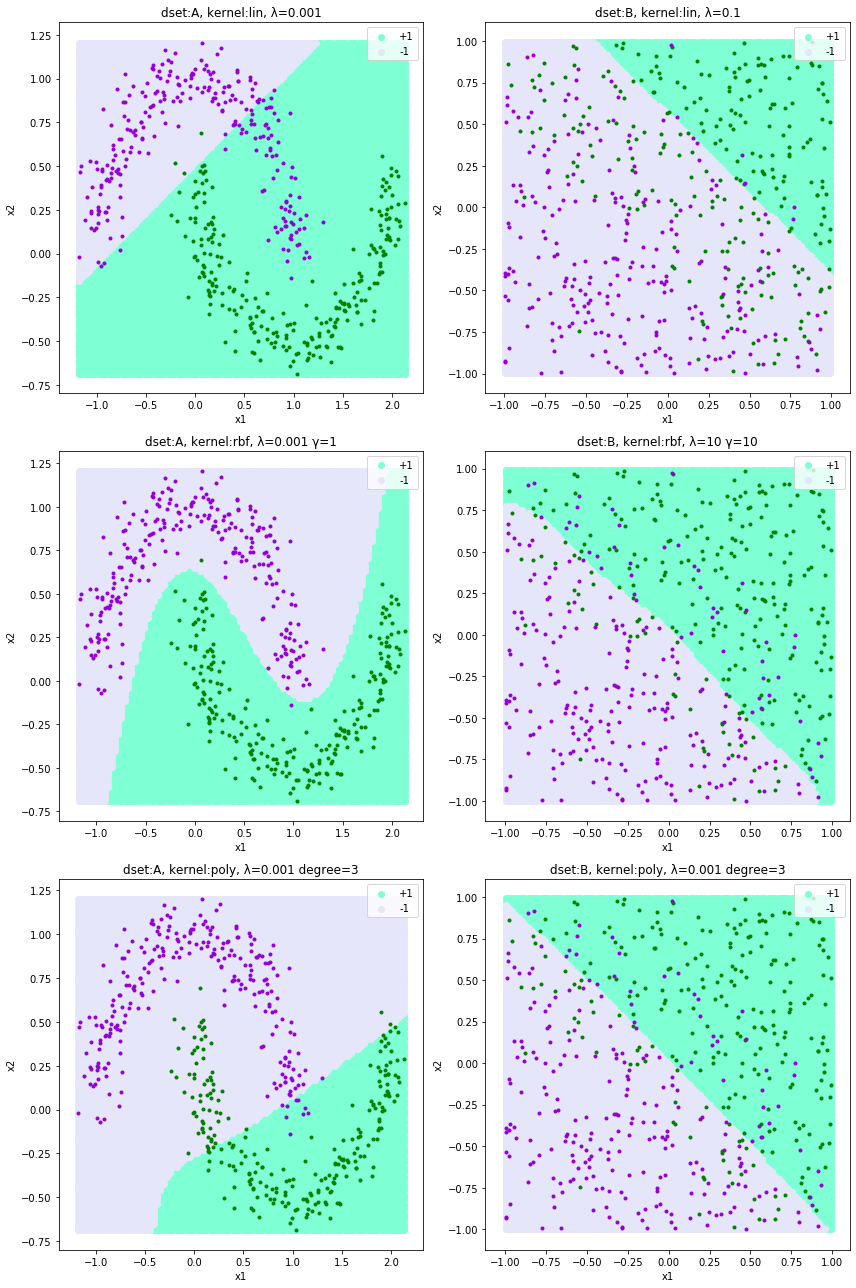

In [127]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
dtfiles=['dataset_A.npz','dataset_B.npz']
dataset_name=["A","B"]
kern_name=["linear", "rbf", "poly"]

# the best parameters are obtained from above code
bestParams=[ [[0.001],[0.001,1],[0.001,3]],
              [[0.1],[10,10],[0.001,2]] ]

titles=[['dset:A, kernel:lin, λ='+str(bestParams[0][0][0]), 'dset:A, kernel:rbf, λ='+str(bestParams[0][1][0])+' γ='+str(bestParams[0][1][1]), 'dset:A, kernel:poly, λ='+str(bestParams[0][2][0])+' degree='+str(bestParams[0][2][1])],
       ['dset:B, kernel:lin, λ='+str(bestParams[1][0][0]), 'dset:B, kernel:rbf, λ='+str(bestParams[1][1][0])+' γ='+str(bestParams[1][1][1]), 'dset:B, kernel:poly, λ='+str(bestParams[0][2][0])+' degree='+str(bestParams[0][2][1])]]



def class_sep(X,Y):
    pos=[]
    neg=[]
    for i in range(len(X)):
        if(Y[i]==1):
            pos.append(X[i])
        else:
            neg.append(X[i])
    return np.array(pos), np.array(neg)

def meshgen(X):
    xmax=np.max(X,axis=0)
    xmin=np.min(X,axis=0)
    x1=np.linspace(xmin[0],xmax[0],100)
    x2=np.linspace(xmin[1],xmax[1],100)
    xv,yv=np.meshgrid(x1,x2)
    x1=xv.reshape(10000,1)
    x2=yv.reshape(10000,1)
    Xmesh=np.stack((x1, x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    return np.array(Xmesh)

def plotIt(title_, ax, X_mesh, Y_mesh_pred, X_test, Y_test):
#   note that we wont plot Y_test_predicted, rather we show the region classified
    Xt_pos,Xt_neg=class_sep(X_test,Y_test)
    Xm_pos,Xm_neg=class_sep(X_mesh,Y_mesh_pred)
    Xt_pos,Xt_neg=np.transpose(Xt_pos),np.transpose(Xt_neg)
    Xm_pos,Xm_neg=np.transpose(Xm_pos),np.transpose(Xm_neg)
    ax.scatter(Xm_pos[0], Xm_pos[1], color='aquamarine', label='+1')
    ax.scatter(Xm_neg[0], Xm_neg[1], color='lavender', label='-1')
    ax.scatter(Xt_pos[0], Xt_pos[1], marker='.', c='green')
    ax.scatter(Xt_neg[0], Xt_neg[1], marker='.', c='darkviolet')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title_)
    ax.legend(loc=1)


fig, axes= plt.subplots(figsize=(12,18), nrows=3, ncols=2)    
for i in range(2):
    dataset=np.load(dtfiles[i])
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    r=int(0.8*len(Y_tr))
    X_train=X_tr[:r]
    Y_train=Y_tr[:r]
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_mesh=meshgen(X_test)
    for j in range(3):
        param=bestParams[i][j]
        ax=axes[j][i]
        if(j==0):
            Y_mesh_pred=predLr_lin(X_train, Y_train, X_mesh, param[0])
            plotIt(titles[i][j], ax, X_mesh, Y_mesh_pred, X_test, Y_test)
        if(j==1):
            Y_mesh_pred=predLr_rbf(X_train, Y_train, X_mesh, param[0],param[1])
            plotIt(titles[i][j], ax, X_mesh, Y_mesh_pred, X_test, Y_test)
        if(j==2):
            Y_mesh_pred=predLr_poly(X_train, Y_train, X_mesh, param[0], param[1])
            plotIt(titles[i][j], ax, X_mesh, Y_mesh_pred, X_test, Y_test)
            
plt.tight_layout()           




# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [15]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

#syntax from course webpage 
#classif_algo =  SVC(C=1, kernel='linear')
#classif_algo =  SVC(C=10, gamma=0.1)
#classifier = classif_algo.fit(X,Y)
#Y_test_pred = classifier.decision_function(X_test)

def accuracy(Y_act,Y_pred):
    acc=0
    length=len(Y_act)
    for i in range(length):
        if(Y_act[i]==Y_pred[i]):
            acc=acc+1
    return acc/length

def linSVM(X_train, Y_train, c):
    classif_algo = SVC(C=c, kernel='linear')
    classifier=classif_algo.fit(X_train,Y_train)
    return classifier
    
def rbfSVM(X_train, Y_train, c, gma):
    classif_algo = SVC(C=c, gamma=gma)
    classifier=classif_algo.fit(X_train,Y_train)
    return classifier
    
def polySVM(X_train, Y_train, c, deg):
    classif_algo = SVC(kernel='poly',C=c, gamma='auto', degree=deg)
    classifier=classif_algo.fit(X_train,Y_train)
    return classifier

def Prediction(classif, X_test):
    Y_test_pred=[]
    for x in X_test:
        Y_test_pred.append(classif.predict([x]))
    return np.array(Y_test_pred)

def SVC_bestHyperParam_lin(X_train, Y_train, X_val, Y_val, C_mat):
    accuracy_result=[]
    for i in range(len(C_mat)):
        classifier=linSVM(X_train, Y_train, C_mat[i])
        Y_val_pred=Prediction(classifier, X_val)
        accuracy_result.append(accuracy(Y_val,Y_val_pred))
    a=[C_mat[np.argmax(accuracy_result)]]
    return a
        
def SVC_bestHyperParam_rbf(X_train, Y_train, X_val, Y_val, C_mat, Gamma):
    accuracy_result = np.zeros((len(C_mat),len(Gamma)))
    for i in range(len(C_mat)):
        for j in range(len(Gamma)):
            classifier=rbfSVM(X_train, Y_train, C_mat[i], Gamma[j])
            Y_val_pred=Prediction(classifier, X_val)
            accuracy_result[i][j]=(accuracy(Y_val,Y_val_pred))
    ind=np.argmax(accuracy_result)
    ind_i=int(ind/len(Gamma))
    ind_j=ind%len(Gamma)
    hyperBest=[C_mat[ind_i], Gamma[ind_j]]
    return np.array(hyperBest)

def SVC_bestHyperParam_poly(X_train, Y_train, X_val, Y_val, C_mat, Degree):
    accuracy_result=np.zeros((len(C_mat),len(Degree)))
    for i in range(len(C_mat)):
        for j in range(len(Degree)):
            classifier=polySVM(X_train, Y_train, C_mat[i], Degree[j])
            Y_val_pred=Prediction(classifier, X_val)
            accuracy_result[i][j]=(accuracy(Y_val,Y_val_pred))
    ind=np.argmax(accuracy_result)
    ind_i=int(ind/len(Degree))
    ind_j=ind%len(Degree) 
    hyperBest=[C_mat[ind_i], Degree[ind_j]]
    return np.array(hyperBest)



In [ ]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.

C_mat=[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
Degree=[1,2,3,5]
Gamma=[0.05,0.1,1,10,500]

def splitTrainset(X_train, Y_train, ratio=0.8):
    n =len(X_train)
    r = int(ratio*n);
    X_t=X_train[:r]
    Y_t=Y_train[:r]
    X_val=X_train[r+1:]
    Y_val=Y_train[r+1:]
    return np.array(X_t), np.array(Y_t), np.array(X_val), np.array(Y_val)

df_name=["A","B","C","D"]
k_name=["lin","rbf", "poly"]
dtfiles=['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']
bestPara=[]
#stores best hyper para for each dataset for each of lin, rbf and poly kernel
accMat_train=[]
accMat_test=[]
#stores 0-1 error of each dataset for each of lin, rbf and poly kernel
print("Best Hyperparameter")
print(" ")
for i in range(4):
    dtfile=dtfiles[i]
    dataset=np.load(dtfile)
    print("-For Dataset " + df_name[i] )
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_train, Y_train, X_val, Y_val= splitTrainset(X_tr, Y_tr)

    bestPara_file=[]
    accMat_train_file=[]
    accMat_test_file=[]
    
    print(" -For Kernel: linear" )
    bestHyper_lin=SVC_bestHyperParam_lin(X_train, Y_train, X_val, Y_val, C_mat)
    print(" -> c="+str(bestHyper_lin))
    classifier=linSVM(X_train, Y_train, bestHyper_lin[0])
    Y_test_pred=Prediction(classifier,X_test)
    Y_train_pred=Prediction(classifier,X_train)
    te_ac=accuracy(Y_test,Y_test_pred)
    tr_ac=accuracy(Y_train,Y_train_pred)
    accMat_test_file.append(te_ac)
    accMat_train_file.append(tr_ac)
    print(" -> Test_error="+str(1-te_ac))
    print(" -> Train_error="+str(1-tr_ac))
    bestPara_file.append(bestHyper_lin)
    
    print(" -For Kernel: rbf" )
    bestHyper_rbf=SVC_bestHyperParam_rbf(X_train, Y_train, X_val, Y_val, C_mat, Gamma)
    print(" -> c="+str(bestHyper_rbf[0])+", γ="+str(bestHyper_rbf[1]))
    classifier=rbfSVM(X_train,Y_train,bestHyper_rbf[0], bestHyper_rbf[1])
    Y_test_pred=Prediction(classifier,X_test)
    Y_train_pred=Prediction(classifier,X_train)
    te_ac=accuracy(Y_test,Y_test_pred)
    tr_ac=accuracy(Y_train,Y_train_pred)
    accMat_test_file.append(te_ac)
    accMat_train_file.append(tr_ac)
    print(" -> Test_error="+str(1-te_ac))
    print(" -> Train_error="+str(1-tr_ac))
    bestPara_file.append(bestHyper_rbf)
    
    print("--For Kernel: poly" )
    bestHyper_poly=SVC_bestHyperParam_poly(X_train, Y_train, X_val, Y_val, C_mat, Degree)
    print(" -> c="+str(bestHyper_poly[0])+", degree="+str(bestHyper_poly[1]))
    classifier=polySVM(X_train, Y_train, bestHyper_poly[0], bestHyper_poly[1])
    Y_test_pred=Prediction(classifier,X_test)
    Y_train_pred=Prediction(classifier,X_train)
    te_ac=accuracy(Y_test,Y_test_pred)
    tr_ac=accuracy(Y_train,Y_train_pred)
    accMat_test_file.append(te_ac)
    accMat_train_file.append(tr_ac)
    print(" -> Test_error="+str(1-te_ac))
    print(" -> Train_error="+str(1-tr_ac))
    bestPara_file.append(bestHyper_poly)
    
    print(" ")
    bestPara.append(bestPara_file)
    accMat_train.append(accMat_train_file)
    accMat_test.append(accMat_train_file)







Best Hyperparameter
 
-For Dataset A
 -For Kernel: linear
 -> c=[1]
 -> Test_error=0.128
 -> Train_error=0.1266666666666667
 -For Kernel: rbf
 -> c=0.1, γ=10.0
 -> Test_error=0.0020000000000000018
 -> Train_error=0.0008333333333333526
--For Kernel: poly
 -> c=1, degree=3
 -> Test_error=0.08399999999999996
 -> Train_error=0.057499999999999996
 
-For Dataset B
 -For Kernel: linear
 -> c=[1]
 -> Test_error=0.19599999999999995
 -> Train_error=0.17083333333333328
 -For Kernel: rbf
 -> c=1000.0, γ=0.1
 -> Test_error=0.19199999999999995
 -> Train_error=0.17583333333333329
--For Kernel: poly
 -> c=1, degree=1
 -> Test_error=0.19599999999999995
 -> Train_error=0.17083333333333328
 
-For Dataset C
 -For Kernel: linear
 -> c=[0.001]
 -> Test_error=0.11447811447811451
 -> Train_error=0.0708333333333333
 -For Kernel: rbf
 -> c=0.001, γ=0.05
 -> Test_error=0.4882154882154882
 -> Train_error=0.49583333333333335
--For Kernel: poly
 -> c=0.001, degree=5.0
 -> Test_error=0.030303030303030276
 -> Train_e

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
### Best Hyperparameters and Observations

| Symbols    |  meaning| 
|------------|---|
|*C*         |SVC parameter  |
|*γ*       |rbf kernel parameter|
|*deg*|polynomial kernel parameter  |   

**Dataset A**: 

| Kernel     | C | deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    |1  |  -     |   -   |  0.127           | 0.128           |
|*rbf*       |0.1|    -   |  10   |   0.00083          | 0.002           |
|*polynomial*|1  |     3  |  -    |     0.0575        |     0.084       |

**Dataset B**: 

| Kernel     | C | deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    |1  |  -     |   -   |    0.1708         | 0.196          |
|*rbf*       |1000|    -   |  0.1   |    0.1758         |  0.192          |
|*polynomial*|1  |     1  |  -    |         0.1708    |    0.196        |

**Dataset C**: 

| Kernel     | C | deg | γ | Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    |  0.001|  -     |   -   |   0.0708          |   0.1145         |
|*rbf*       |0.001|    -   |  0.05   |   0.4958          |   0.4882         |
|*polynomial*| 0.001 | 5    |  -    |     0.0        |     0.0303       |

**Dataset D**: 

| Kernel     | C | deg | γ| Train error | Test error |
|------------|---|--------|-------|-------------|------------|
|*linear*    |  1|  -     |   -   |   0.0375          | 0.0591           |
|*rbf*       |0.001|    -   |0.05     |     0.465        |   0.2307         |
|*polynomial*| 0.001 |     1 |  -    |     0.0375        |   0.0591         |


**Observations**: 

1.Test accuracies of Dataset A is higher than that of B because of their separability

2.rbf kernel is suitable amongst the three tested kernels for Datasets A and B

3.For dataset C polynomial kernel with degree 5 gives exceptional accuracy

4.Dataset C and D gives quite good results with linear kernels as compared to rbf kernel, probably due to overfitting

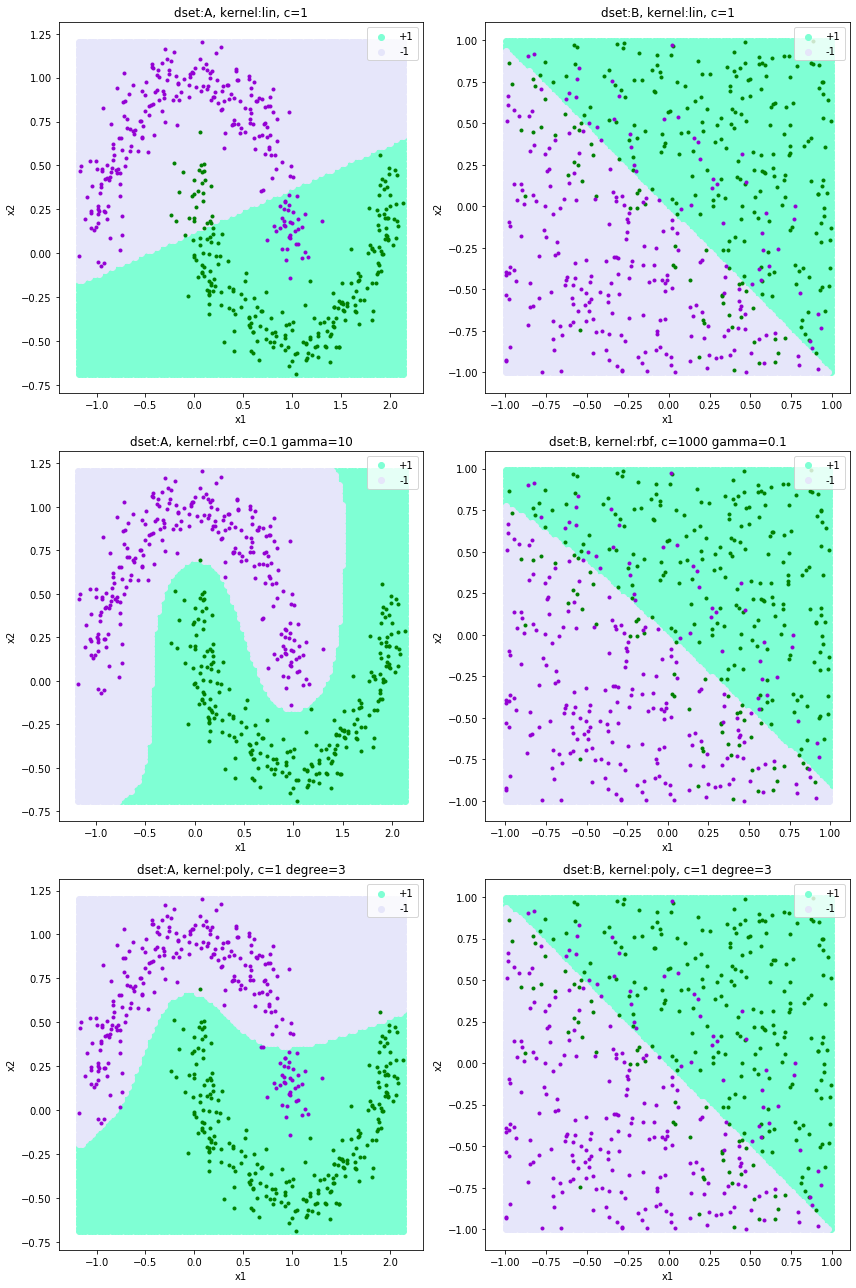

In [126]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
dtfiles=['dataset_A.npz','dataset_B.npz']
dataset_name=["A","B"]
kern_name=["linear", "rbf", "poly"]

# the best parameters are obtained from above code
bestParams=[ [[1],[0.1,10],[1,3]],
              [[1],[1000,0.1],[1,1]] ]

titles=[['dset:A, kernel:lin, c='+str(bestParams[0][0][0]), 'dset:A, kernel:rbf, c='+str(bestParams[0][1][0])+' gamma='+str(bestParams[0][1][1]), 'dset:A, kernel:poly, c='+str(bestParams[0][2][0])+' degree='+str(bestParams[0][2][1])],
       ['dset:B, kernel:lin, c='+str(bestParams[1][0][0]), 'dset:B, kernel:rbf, c='+str(bestParams[1][1][0])+' gamma='+str(bestParams[1][1][1]), 'dset:B, kernel:poly, c='+str(bestParams[0][2][0])+' degree='+str(bestParams[0][2][1])]]



def class_sep(X,Y):
    pos=[]
    neg=[]
    for i in range(len(X)):
        if(Y[i]==1):
            pos.append(X[i])
        else:
            neg.append(X[i])
    return np.array(pos), np.array(neg)

def meshgen(X):
    xmax=np.max(X,axis=0)
    xmin=np.min(X,axis=0)
    x1=np.linspace(xmin[0],xmax[0],100)
    x2=np.linspace(xmin[1],xmax[1],100)
    xv,yv=np.meshgrid(x1,x2)
    x1=xv.reshape(10000,1)
    x2=yv.reshape(10000,1)
    Xmesh=np.stack((x1, x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    return np.array(Xmesh)

def plotIt(title_, ax, X_test, Y_test, classifier):
    Xmesh=meshgen(X_test)
    Y_mesh_pred=Prediction(classifier, Xmesh)
    Xt_pos,Xt_neg=class_sep(X_test,Y_test)
    Xm_pos,Xm_neg=class_sep(Xmesh,Y_mesh_pred)
    Xt_pos,Xt_neg=np.transpose(Xt_pos),np.transpose(Xt_neg)
    Xm_pos,Xm_neg=np.transpose(Xm_pos),np.transpose(Xm_neg)
    ax.scatter(Xm_pos[0], Xm_pos[1], color='aquamarine', label='+1')
    ax.scatter(Xm_neg[0], Xm_neg[1], color='lavender', label='-1')
    ax.scatter(Xt_pos[0], Xt_pos[1], marker='.', c='green')
    ax.scatter(Xt_neg[0], Xt_neg[1], marker='.', c='darkviolet')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title_)
    ax.legend(loc=1)


fig, axes= plt.subplots(figsize=(12,18), nrows=3, ncols=2)    
for i in range(2):
    dataset=np.load(dtfiles[i])
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    r=int(0.8*len(Y_tr))
    X_train=X_tr[:r]
    Y_train=Y_tr[:r]
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    for j in range(3):
        param=bestParams[i][j]
        ax=axes[j][i]
        if(j==0):
            classifier=linSVM(X_train, Y_train, param[0])
            plotIt(titles[i][j], ax, X_test, Y_test, classifier)
        if(j==1):
            classifier=rbfSVM(X_train, Y_train, param[0], param[1])
            plotIt(titles[i][j], ax, X_test, Y_test, classifier)
        if(j==2):
            classifier=polySVM(X_train, Y_train, param[0], param[1])
            plotIt(titles[i][j], ax, X_test, Y_test, classifier)
            
plt.tight_layout()           



# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For synthetic data sets (dataset A and dataset B) report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [253]:
# CodeWrite cell
# Write Decision tree classifier from scratch, write code for choosing best node size to stop splitting.
# write only functions here

def accuracy(Y_true,Y_pred):
    l = len(Y_true)
    count=np.sum(Y_true==Y_pred)
    return count/l

# reports accuracy for each split x[ind]>=val or threshold :)
def split_accuracy(X_train,Y_train,val,ind):
    Y_pred = []
    for x in X_train:
        if x[ind]>=val:
            Y_pred.append(1)
        else:
            Y_pred.append(-1)
    l = len(Y_pred)
    ct = 0
    for i in range(l):
        if(Y_pred[i] == Y_train[i]):
            ct = ct + 1
    return ct/l

def H(p):
    if p==0 or p==1:
        return 0
    else:
        return -(p*np.log2(p) + (1-p)*np.log2(1-p))
def split_entropy(X_train,Y_train,val,ind):
    l=len(X_train)
    pr=0
    qr=0
    ql=0
    for i in range(l):
        x=X_train[i]
        if x[ind]>=val: #goes to right
            pr=pr+1              #no of points on right
            if Y_train[i]==1:
                qr=qr+1          #no of positive points on right
        else:
            if Y_train[i]==1:
                ql=ql+1
    pl=l-pr
    if pr!=0:
        qr=qr/pr
    if pl!=0:
        ql=ql/pl
    pl=pl/l
    pr=pr/l
    return pl*H(ql)+pr*H(qr)
#     entropy is defined as plHl+prHr, Hp=-plogp-(1-p)log(1-p)


#tells whether it can be splitted
def is_split(X_train, threshold):
    l=len(X_train)
    ind=threshold[0]
    val=threshold[1]
    n=0
    for x in X_train:
        if x[ind]>=val:
            n=n+1
    if n==0 or n==l:
        return False
    return True

# here I split the tree
def bestSplit(X_train,Y_train,criteria,features):
#     features=len(X_train[0])
# features is amatrix contaning indices of features
    x_min = np.min(X_train,axis=0)
    x_max = np.max(X_train,axis=0)
    thresholds=[]
#     here i put split values for each feature
    for f in features:
        thresholds.append(np.linspace(x_min[f],x_max[f],15)[1:-1])    
    best_threshold = () # store(i,a,1 or -1) -> x[i]>=a is classified as 1 or -1
    best_accuracy = 0
    least_entropy=1
#   i represent the index of the feature of X
    if(criteria=='accuracy'):
        j=-1
        for i in features:
            j=j+1
            for a in thresholds[j]:
                curr_threshold = (i,a,1)
                curr_acc = split_accuracy(X_train,Y_train,a,i)
                if(curr_acc < 0.5):
                    curr_threshold = (i,a,-1)
                    curr_acc = 1 - curr_acc
                if(curr_acc >= best_accuracy):
                    if (is_split(X_train,curr_threshold)):
                        best_accuracy = curr_acc
                        best_threshold = curr_threshold
    elif(criteria=='entropy'):
        j=-1
        for i in features:
            j=j+1
            for a in thresholds[j]:
                curr_threshold = (i,a,1)
                curr_entropy=split_entropy(X_train,Y_train,a,i)
                if(curr_entropy>0.5):
                    curr_threshold=(i,a,-1)
                    curr_entropy=1-curr_entropy
                if(curr_entropy <= least_entropy):
                    if (is_split(X_train,curr_threshold)):
                        least_entropy = curr_entropy
                        best_threshold = curr_threshold
    X_right,Y_right,X_left, Y_left = [[],[],[],[]]
    l = len(X_train)
    ind = best_threshold[0]
    val = best_threshold[1]
    for i in range(l):
        if(X_train[i][ind] >= val):
            X_right.append(X_train[i])
            Y_right.append(Y_train[i])
        else:
            X_left.append(X_train[i])
            Y_left.append(Y_train[i])
    return np.array(X_left),np.array(X_right),np.array(Y_left), np.array(Y_right),ind,val

# for prediction at last 
def predict_class(Y_train):
    pos=np.count_nonzero(Y_train == 1)
    ratio = pos/len(Y_train)
    if (ratio >= 0.5):
        return 1
    else :
        return -1

# check if remaining of the dset is pure
def isPure(Y_train):
    a=Y_train[0]
    for i in range(1,len(Y_train)):
        if Y_train[i]!=a:
            return False
    return True

# this will build tree recursively     
def buildDecisionTree(X_train,Y_train,minNodeSize,criteria,features):
#node is a tuple(index, threshValue, nodeLeftBranch, nodeRightBranch, classPred(+-1 only for leaf node))
    global pos
    curr_pos = pos
    pos = pos+1
    if(len(X_train)<=minNodeSize):
        c = predict_class(Y_train)
        node_tuples.append((-1,-1,-1,-1,c))
    elif (isPure(Y_train)):
        c = Y_train[0]
        node_tuples.append((-1,-1,-1,-1,c))
    else:
        X_left,X_right,Y_left,Y_right,ind,a = bestSplit(X_train, Y_train, criteria,features)
        node_tuples.append((ind,a,-1,-1,0))
        leftBranch = buildDecisionTree(X_left,Y_left,minNodeSize,criteria,features)
        rightBranch = buildDecisionTree(X_right,Y_right,minNodeSize,criteria,features)
        node_tuples[curr_pos] = (ind,a,leftBranch,rightBranch,0)
    return curr_pos

# master function to build tree, return trees
def TreeBuild(X_train,Y_train,size,criteria,features):    
    global node_tuples
    global pos
    node_tuples = []
    pos = 0
    buildDecisionTree(X_train,Y_train,size,criteria,features)
    return node_tuples

# recall node tuple is like(ind,a,leftB,rightB,dec)
def predict_tree(X,tree):
    Y_pred=[]
    for x in X:
        node = tree[0] #root node
        while (node[2]!= -1):
            if(x[node[0]] >= node[1]): #direct to rightBranch
                node = tree[node[3]]
            else:                      #direct to leftBranch
                node = tree[node[2]]
        Y_pred.append(node[4])                 #return decision
    return Y_pred

In [264]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.
def splitTrainSet(X_train,Y_train,ratio=0.8):
    r=int(ratio*len(X_train))
    return np.array(X_train[:r]),np.array(Y_train[:r]),np.array(X_train[r+1:]),np.array(Y_train[r+1:])

criterion=['accuracy','entropy']
minSizeNode=[5,7,10,15,20,50]

def best_DecisionTree(X_train,Y_train,X_test,Y_test):
    features=np.arange(len(X_train[0]))
#     print(len(features))
    X_train,Y_train,X_val,Y_val=splitTrainSet(X_train,Y_train,ratio=0.8)
    for criteria in criterion:
        print(" -For criteria: "+ criteria)
        acc_mat=[]
        for i in range(len(minSizeNode)):
#             print(i)
            tree=TreeBuild(X_train,Y_train,minSizeNode[i],criteria,features)
            Y_pred_val=predict_tree(X_val,tree)
            acc_mat.append(accuracy(Y_pred_val,Y_val))
        ind=np.argmax(acc_mat)
        tree=TreeBuild(X_train,Y_train,minSizeNode[ind],criteria,features)
        print("   min node size = "+str(minSizeNode[ind]))
        print("   train err = "+str(1-accuracy(Y_train,predict_tree(X_train,tree))))
        print("   test err = "+str(1-accuracy(Y_test,predict_tree(X_test,tree))))

data_files = ['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']
for data_file in data_files:
    dataset = np.load(data_file) # when .npz file is given as input, it returns a dictionary of the form {filename:array}
    print(data_file)
    X_train = dataset[dataset.files[0]]
    Y_train = dataset[dataset.files[1]]
    X_test = dataset[dataset.files[2]]
    Y_test = dataset[dataset.files[3]]
    best_DecisionTree(X_train,Y_train,X_test,Y_test)

dataset_A.npz
 -For criteria: accuracy
   min node size = 5
   train err = 0.02749999999999997
   test err = 0.08999999999999997
 -For criteria: entropy
   min node size = 5
   train err = 0.0
   test err = 0.03200000000000003
dataset_B.npz
 -For criteria: accuracy
   min node size = 50
   train err = 0.17000000000000004
   test err = 0.19599999999999995
 -For criteria: entropy
   min node size = 50
   train err = 0.2825
   test err = 0.32199999999999995
dataset_C.npz
 -For criteria: accuracy
   min node size = 15
   train err = 0.06333333333333335
   test err = 0.12794612794612792
 -For criteria: entropy


KeyboardInterrupt: 

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  
## Best Hyperparameter, Train and Test error, Observations
#### Accuracy Criterion
| Dataset | min. node size | train_error | test_error |
|---------|----------------|-------------|------------|
| A       | 5              | 0.0275      | 0.0899     |
| B       | 50             | 0.1700      | 0.1959     |
| C       | 15             | 0.0633      | 0.1279     |
| D       | 5              | 0.03125     |  0.0591    |

#### Entropy Criterion
| Dataset | min. node size | train_error | test_error |
|---------|----------------|-------------|------------|
| A       | 5              | 0           | 0.032      |
| B       | 50             | 0.2825      | 0.322      |
| C       | 5              | 0.32166     |   0.4242   |
| D       | 5              |  0.0593     |    0.13609 |

#### Observations
1. If the minimum size of node is set to 1, the decision tree will gain 100% training accuracy, however it will usually overfit. By validation we avoid overfitting.

2. Dataset B is separated by an inclined line (45 degrees), so building decision tree with splitting orthogonal axes wont do good. To obtain better results we could use a feature vector like x1+x2 or x1-x2.

3. The hyperparameter chosen if the splitiing criterion is accuracy may differ from when the splitting criterion is entropy, as it evident in the above table. Minimizing entropy is same as maximizing the accuracy

4. For dataset C, minimum node size of 15 gives best training accuracy and test accuracy and for dataset D optimal minimum node size is 5

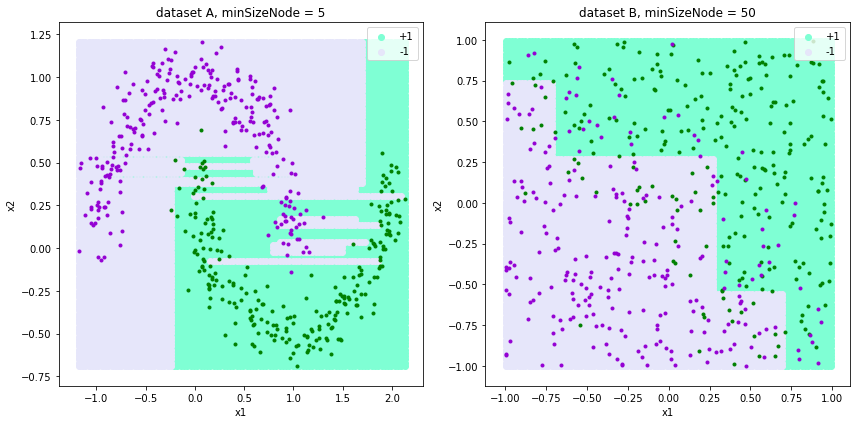

In [263]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

def class_sep(X,Y):
    pos=[]
    neg=[]
    for i in range(len(X)):
        if(Y[i]==1):
            pos.append(X[i])
        else:
            neg.append(X[i])
    return np.array(pos), np.array(neg)

def meshgen(X):
    xmax=np.max(X,axis=0)
    xmin=np.min(X,axis=0)
    x1=np.linspace(xmin[0],xmax[0],100)
    x2=np.linspace(xmin[1],xmax[1],100)
    xv,yv=np.meshgrid(x1,x2)
    x1=xv.reshape(10000,1)
    x2=yv.reshape(10000,1)
    Xmesh=np.stack((x1, x2), axis=-1)
    Xmesh=Xmesh.reshape(10000,2)
    return np.array(Xmesh)

def plotIt(title_, ax, X_mesh, Y_mesh_pred, X_test, Y_test):
#   note that we wont plot Y_test_predicted, rather we show the region classified
    Xt_pos,Xt_neg=class_sep(X_test,Y_test)
    Xm_pos,Xm_neg=class_sep(X_mesh,Y_mesh_pred)
    Xt_pos,Xt_neg=np.transpose(Xt_pos),np.transpose(Xt_neg)
    Xm_pos,Xm_neg=np.transpose(Xm_pos),np.transpose(Xm_neg)
    ax.scatter(Xm_pos[0], Xm_pos[1], color='aquamarine', label='+1')
    ax.scatter(Xm_neg[0], Xm_neg[1], color='lavender', label='-1')
    ax.scatter(Xt_pos[0], Xt_pos[1], marker='.', c='green')
    ax.scatter(Xt_neg[0], Xt_neg[1], marker='.', c='darkviolet')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title_)
    ax.legend(loc=1)

bestSize=[5,50]
titles=["dataset A, minSizeNode = "+str(bestSize[0]),"dataset B, minSizeNode = "+str(bestSize[1])]
dtfiles=['dataset_A.npz','dataset_B.npz']
fig, axes= plt.subplots(figsize=(12,6), nrows=1, ncols=2)
for i in range(2):
    dataset=np.load(dtfiles[i])
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    r=int(0.8*len(Y_tr))
    X_train=X_tr[:r]
    Y_train=Y_tr[:r]
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_mesh=meshgen(X_test)
    features=np.arange(len(X_train[0]))
    tree=TreeBuild(X_train,Y_train,bestSize[i],'accuracy',features)
    Y_mesh_pred=predict_tree(X_mesh,tree)
    ax=axes[i]
    plotIt(titles[i], ax, X_mesh, Y_mesh_pred, X_test, Y_test)
plt.tight_layout()   


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier. 
# a=fraction of data per tree, b= fraction of features per tree of a random forest
def dataSplitter(X_train,Y_train,a,b):
    no_dp=len(X_train)
    no_feat=len(X_train[0])
    X=[]
    Y=[]
    Xind=np.random.choice(no_dp, int(a*no_dp), replace=False)
    for i in Xind:
        X.append(X_train[i])
        Y.append(Y_train[i])
    features=np.random.choice(no_feat, int(b*no_feat), replace=False)
    return X,Y,features

# N is the no of trees
def randomForestTrees(X_train,Y_train,N,minSizeNode,criteria,a,b):
    trees=[]
    for n in range(N):
        X_train_tree,Y_train_tree,features= dataSplitter(X_train,Y_train,a,b)
        tree=TreeBuild(X_train_tree,Y_train_tree,minSizeNode,criteria,features) #or use best tree
        trees.append(tree)
    return trees

# each tree in trees consist of tuples (ind,a,leftchild,rightchild,label)        
def predict_forest(X_test,trees):
    N=len(trees)
    Y_pred=np.zeros(len(X_test))
    for i in range(N):
        tree=trees[i]
        Y_pred=Y_pred + predict_tree(X_test,tree)
    Y_pred[Y_pred==0]=1
    return np.sign(Y_pred)




In [267]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
def splitTrainSet(X_train,Y_train,ratio=0.8):
    r=int(ratio*len(X_train))
#     print(r)
    return np.array(X_train[:r]),np.array(Y_train[:r]),np.array(X_train[r+1:]),np.array(Y_train[r+1:])

num_trees=[10,50,100,150]
t=len(num_trees)
minNodesizes=[3,7,10,15]
n=len(minNodesizes)
criterion=['accuracy','entropy']

dtfiles=['dataset_A.npz','dataset_B.npz','dataset_C.npz','dataset_D.npz']
for i in range(4):
    print("For: " + dtfiles[i])
    dataset=np.load(dtfiles[i])
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_train,Y_train,X_val,Y_val=splitTrainSet(X_tr,Y_tr,ratio=0.8)
#     print(len(X_train))
    for criteria in criterion:
        print(" criterion: " + criteria)
        acc_mat=np.zeros((t,n))
        for i in range(t):
            for j in range(n):
                forest=randomForestTrees(X_train,Y_train,num_trees[i],minNodesizes[j],criteria,0.5,0.5)
                Y_val_pred=predict_forest(X_val,forest)
                acc_mat[i][j]=accuracy(Y_val,Y_val_pred)
        ind=np.argmax(acc_mat)
        p,q=num_trees[int(ind/n)],minNodesizes[ind%n]
        forest=randomForestTrees(X_train,Y_train,p,q,criteria,0.5,0.5)
        train_err=1-accuracy(Y_train,predict_forest(X_train,forest))
        test_err=1-accuracy(Y_test,predict_forest(X_test,forest))
        print("   num_trees = "+str(p)+"  minNodeSize = "+str(q))
        print("   train_err = "+str(train_err)+"  test error = "+str(test_err))



For: dataset_A.npz
 criterion: accuracy
   num_trees = 150  minNodeSize = 15
   train_err = 0.040000000000000036  test error = 0.07399999999999995
 criterion: entropy
   num_trees = 100  minNodeSize = 7
   train_err = 0.035833333333333384  test error = 0.08599999999999997
For: dataset_B.npz
 criterion: accuracy
   num_trees = 50  minNodeSize = 15
   train_err = 0.16666666666666663  test error = 0.238
 criterion: entropy
   num_trees = 100  minNodeSize = 15
   train_err = 0.20999999999999996  test error = 0.252
For: dataset_C.npz
 criterion: accuracy


KeyboardInterrupt: 

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  
## Best Hyperparameter, Train and Test error, Observations
*observations may vary as the training datasets for trees are randomly generated*
#### Accuracy Criterion
| Dataset | no_of_trees | minNodeSize | train_error | test_error |
|---------|-------------|-------------|-------------|------------|
| A       | 150         | 15          | 0.040       | 0.0739     |
| B       | 50          | 15          | 0.166       | 0.238      |
| C       |   50       |    7        |    0.031         |  0.041          |
| D       |  10         |   3         |  0.040625   |  0.0236    |

#### Entropy Criterion
| Dataset | no_of_trees | minNodeSize | train_error | test_error |
|---------|-------------|-------------|-------------|------------|
| A       | 100         | 7           | 0.0358      | 0.0859     |
| B       | 100         | 15          | 0.209       | 0.252      |
| C       |   50          |   3          |  0.033           |  0.026          |
| D       |   50        |   3         |    0.04687  |    0.0473  |

#### Observations
1. For the synthetic 2 dimensional datsets A and B, training trees on just 1 dimension(50%) isn't a good choice. So to get better accuracy we the number of treest must be increased. Random forest gives best result with 150 trees.
2. For the datasets C and D, training  trees on 32 features(50%) is viable. Here random forest does better with lesser number of trees.
3. The results obtained through entropy as criterion may differ when the criterion is accuracy
4. For Dataset B the accuracy is still not good becuase of its geometry(as discussed in previous observation table)
5. Random forest is a powerful way of combining weak learners to get higher accuracy

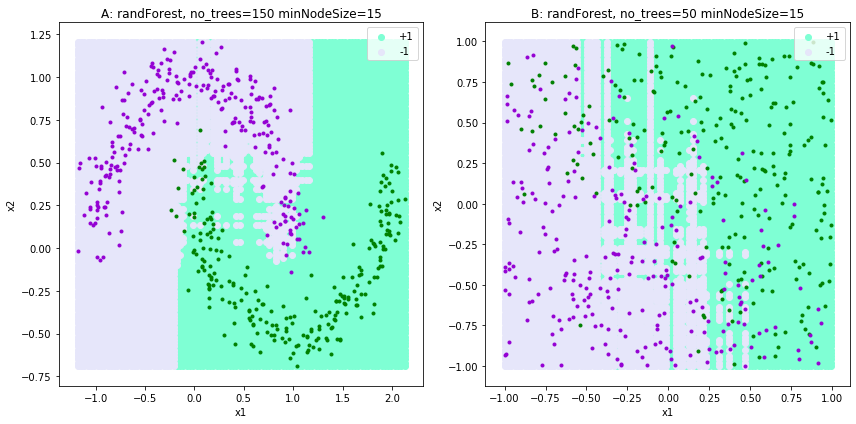

In [287]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 


# def plotIt(title_, ax, X_mesh, Y_mesh_pred, X_test, Y_test):
size=[15,15]
no_trees=[150,50]
titles=["A: randForest, no_trees="+str(no_trees[0])+" minNodeSize="+str(size[0]), "B: randForest, no_trees="+str(no_trees[1])+" minNodeSize="+str(size[1])]
fig, axes= plt.subplots(figsize=(12,6), nrows=1, ncols=2)
for i in range(2):
    dataset=np.load(dtfiles[i])
    X_tr=np.array(dataset[dataset.files[0]])
    Y_tr=np.array(dataset[dataset.files[1]])
    X_test=np.array(dataset[dataset.files[2]])
    Y_test=np.array(dataset[dataset.files[3]])
    X_train,Y_train,X_val,Y_val=splitTrainSet(X_tr,Y_tr,ratio=0.8)
    X_mesh=meshgen(X_test)
    forest=forest=randomForestTrees(X_train,Y_train,no_trees[i],size[i],'accuracy',0.5,.5)
    Y_mesh_pred=predict_forest(X_mesh,forest)
    ax=axes[i]
    plotIt(titles[i], ax, X_mesh, Y_mesh_pred, X_test, Y_test)
plt.tight_layout()    
                                              
                                            